<a href="https://colab.research.google.com/github/FreeVoid5/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasを使用したディープラーニングをやってみる
## 画像認識を行う

### ライブラリの読み込み

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

### 学習済みモデルの読み込み

In [3]:
model = VGG16(weights = 'imagenet')

### 画像判定のための関数

In [4]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size = (224,224,))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  #学習モデルで判定実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top = featuresize)
  return results
#関数終わり


### 画像表示のための関数

In [5]:
def showimg(filename, title, i):
  im = Image.open(filename) #画像ファイルを開く
  im_list = np.array(im) #画像ビットデータをndarrayにする
  plt.subplot(2, 5, i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
#関数終わり

### Kaggleにある画像データを利用する
https://www.kaggle.com/<br>
犬猫判定用の画像データ<br>
https://www.kaggle.com/c/dogs-vs-cats/data

## 指定されたURLからファイルをダウンロードする

In [6]:
#wgetでwebからファイルをダウンロードする
#GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること
#小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでok
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 01:03:07--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 173.194.212.100, 173.194.212.101, 173.194.212.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rrh61s79mc02btlhaocpboaq9gqsjmia/1664845350000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=6bf624d7-71d4-4f77-a708-1e270a26c11a [following]
--2022-10-04 01:03:07--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rrh61s79mc02btlhaocpboaq9gqsjmia/1664845350000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=6bf624d7-71d4-4f77-a708-1e270a26c11a
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 108.177

## Colabに自分のGoogleアカウントのドライブをマウントする

In [7]:
#googleドライブを操作するモジュールをimport
from google.colab import drive
#googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DLしてきたファイルをマウントしたディレクトリにコピーする

In [8]:
#コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
#すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok = True)
!pwd #今いるディレクトリを表示
#ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
#test.zipはいったん使わないのでコピーしない

/content


# GoogleドライブからColabへファイルをコピー

In [9]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


  # zipファイルを解凍する

In [10]:
#unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

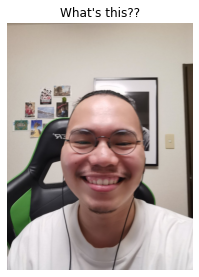

[('n03630383', 'lab_coat', 0.53648585), ('n04356056', 'sunglasses', 0.07019822), ('n04317175', 'stethoscope', 0.05235683), ('n04162706', 'seat_belt', 0.032336067), ('n04270147', 'spatula', 0.026275815), ('n04355933', 'sunglass', 0.019386094), ('n04376876', 'syringe', 0.017734198), ('n02992529', 'cellular_telephone', 0.01325448), ('n03041632', 'cleaver', 0.010892539), ('n03633091', 'ladle', 0.010141307)]


In [12]:
#画像を指定する変数
filename ="train/EhzvES2UYAEDAlE.jpg"
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename, "What's this??", i+1)
#ループ終わり
plt.show()

#表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)
